preparation of data sets:
    generate charts about amount of data
    --- todo: ---
    generate metadata file
    generate spectograms in folders

In [2]:
import pandas as pd
from os.path import isfile, join
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import utils 


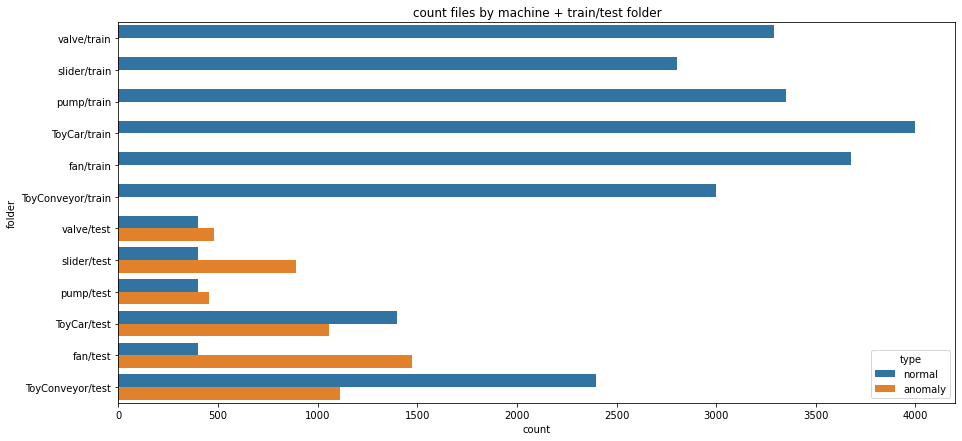

In [3]:
df = pd.DataFrame(data = utils.data_allFiles()) # init df: list of all files in all folders
plt.figure(figsize=(15,7))
sns.countplot(data=df, y="folder", hue="type").set_title('count files by machine + train/test folder'); # number of files in each folder


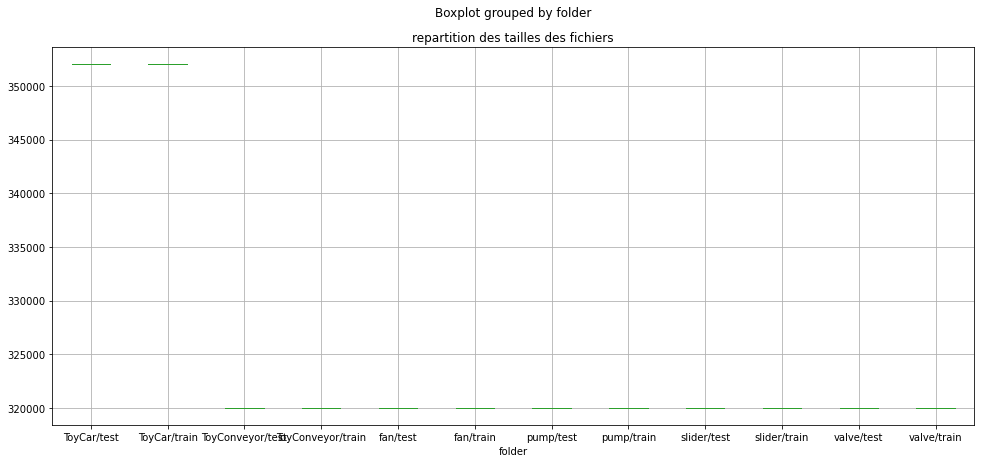

In [4]:
df.boxplot(column= 'size', by='folder', figsize= (16,7)).set_title('repartition des tailles des fichiers'); # compare sizes files
plt.show()


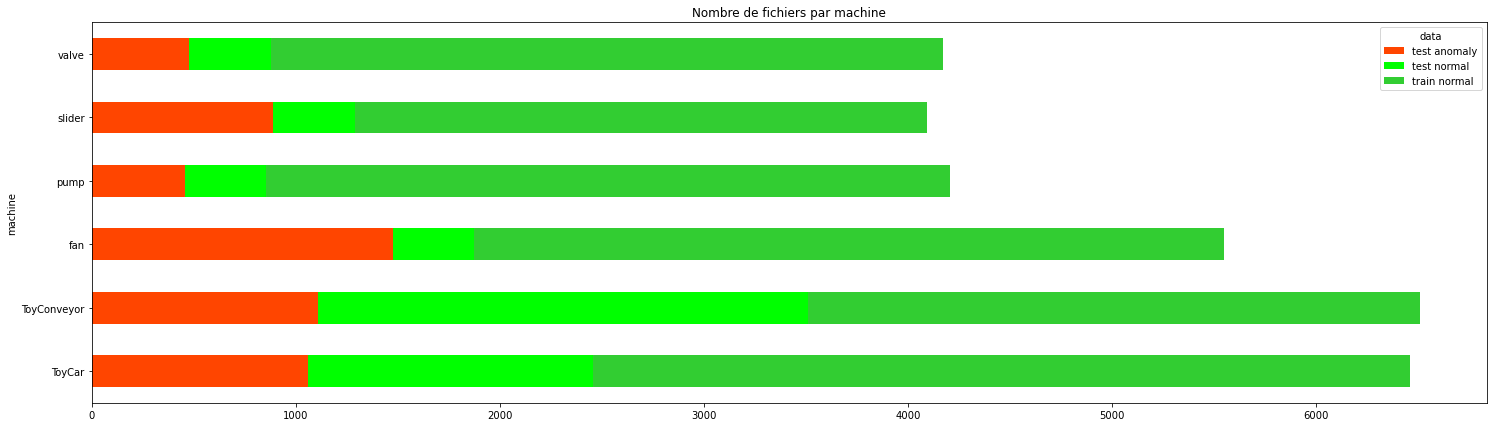

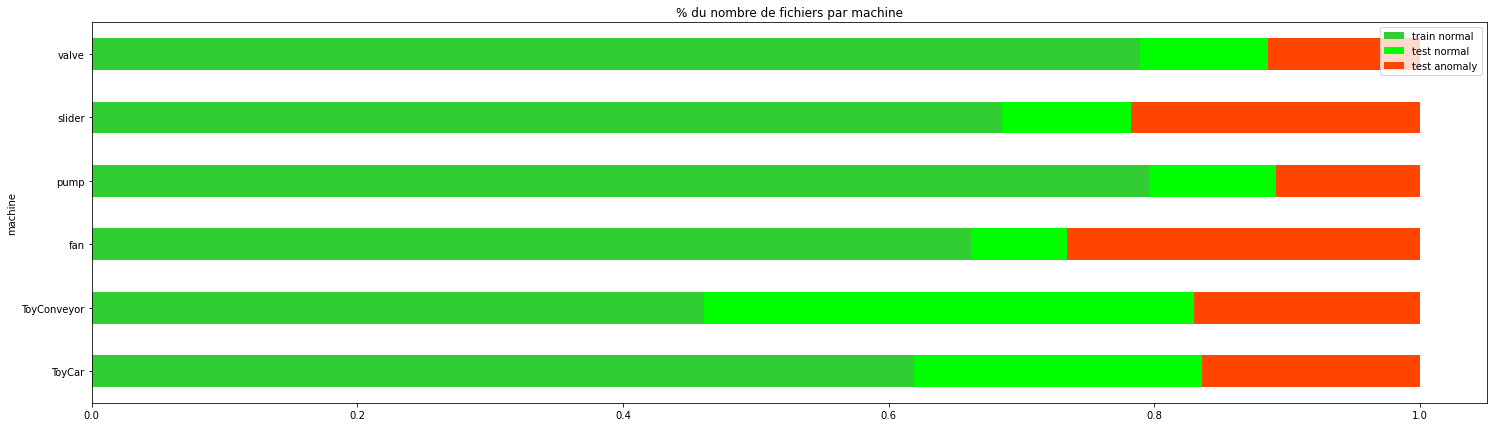

In [6]:

#df_plot = df.groupby(['folder', 'type']).size().reset_index().pivot(columns='type', index='folder', values=0)
#df_plot.plot(kind='barh', stacked=True, color=['red', 'green'], figsize = (25,7))
#plt.show()

# create new columns
df['machine'] = df.apply(lambda x: x['folder'].split('/')[0], axis =1)
df['step'] = df.apply(lambda x: x['folder'].split('/')[1], axis =1)
df['data'] = df['step'] + ' ' + df['type']

# affichage de la répartion absolue des données pour chaque machine
df_plot = df.groupby(['machine', 'data']).size().reset_index().pivot(columns='data', index='machine', values=0)
df_plot.plot(kind='barh', stacked=True,
             color=['orangered', 'lime', 'limegreen'], figsize = (25,7),
             title='Nombre de fichiers par machine')
plt.show()

# affichage de la répartion relative des données pour chaque machine
df_plot_pc = pd.DataFrame()
samples = df_plot['test anomaly'] + df_plot['test normal'] + df_plot['train normal']
df_plot_pc['train normal'] = df_plot['train normal'] / samples
df_plot_pc['test normal'] = df_plot['test normal'] / samples
df_plot_pc['test anomaly'] = df_plot['test anomaly'] / samples
df_plot_pc.plot(kind='barh', stacked=True,
                color=['limegreen', 'lime', 'orangered'], figsize = (25,7),
                title='% du nombre de fichiers par machine')
plt.show()